<h1>Softmax Classifer 1D</h1>

<h2>Table of Contents</h2>
<p>In this lab, you will use Softmax to classify three linearly separable classes, the features are in one dimension </p>
<div style="background: #FF0000; color: #FFFFFF; font-weight: bolder; font-size: 180%">No Softmax was used in this lab!!!</div>
<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Softmax">Build Softmax Classifier</a></li>
    <li><a href="#Model_Cost">Train the Model</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>

In [34]:
# Import the libraries we need for this lab

import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [35]:
# Use the helper function to plot labeled data points: 
# Create class for plotting

def plot_data(data_set, model = None, n = 1, color = False):
    X = data_set[:][0]
    Y = data_set[:][1]
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), 'bo', label = 'y = 0')
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y == 1].numpy(), 'ro', label = 'y = 1')
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), 'go', label = 'y = 2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat=0', 'yhat=1', 'yhat=2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b, y_l, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label = y_l)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
    plt.legend()
    plt.show()

In [3]:
# set the random seed
torch.manual_seed(0)

<h2 id="Makeup_Data">Make Some Data</h2> 

Create some linearly separable data with three classes: 

In [36]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-2, 2, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        aa = (xx > -1)[:, 0]
        
        bb = (xx < 1)[:, 0]
        cc = aa*bb
        dd = (xx >=1)[:,0]

        self.y[cc] = 1
        self.y[dd] = 2
#         self.y[(self.x > -1.0)[:, 0]*(self.x < 1.0)[:, 0]] = 1
#         self.y[(self.x >= 1.0)[:, 0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]
    
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

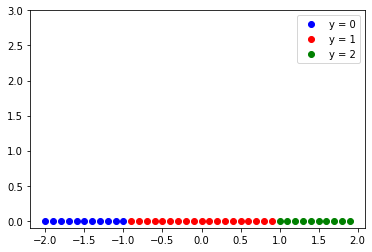

In [37]:
# Create data set object and plot dataset object
data_set = Data()
data_set.x
plot_data(data_set)

<h2 id="Softmax">Build a Softmax Classifier </h2>

Build a Softmax classifier by using the Sequential module:

In [38]:
# Build Softmax Classifier technically you only need nn.Linear

model = nn.Sequential(nn.Linear(1, 3))     # 3 classes
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5239],
                      [-0.4626],
                      [-0.4925]])),
             ('0.bias', tensor([-0.0875, -0.0961, -0.7790]))])

<h2 id="Model">Train the Model</h2> 

Create the criterion function, the optimizer and the dataloader

In [39]:
# Create criterion function, optimizer, and dataloader

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
trainloader = DataLoader(dataset=data_set, batch_size=5)

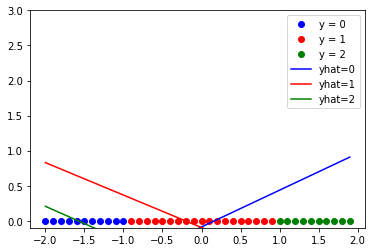

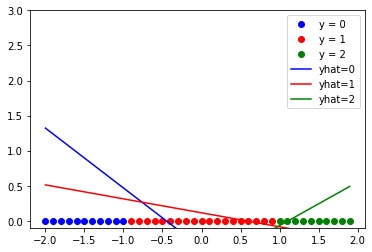

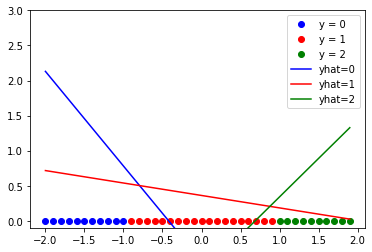

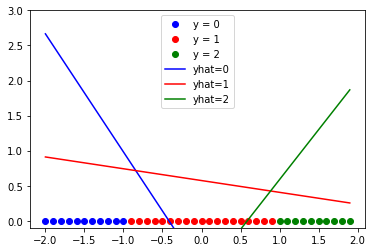

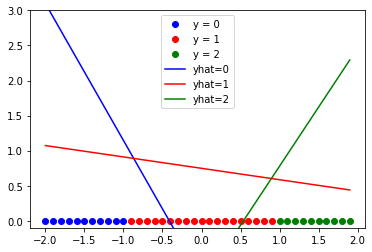

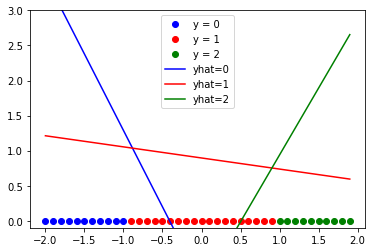

In [40]:
# Train the model

LOSS = []

def train_model(epochs):
    for epoch in range(epochs):
        if epoch % 50 == 0:
            plot_data(data_set, model)
            
        for x, y in trainloader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss)
            loss.backward()
            optimizer.step()
            
# ==============================
train_model(300)

        

<h2 id="Result">Analyze Results</h2> 

Find the predicted class on the test data: 

In [41]:
# Make the prediction 

z = model(data_set.x)
_, yhat = z.max(1)
print("The prediction: ", yhat)

The prediction:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [51]:
# print the accuracy
list(model.parameters())


[Parameter containing:
 tensor([[-2.3780],
         [-0.1555],
         [ 2.1023]], requires_grad=True),
 Parameter containing:
 tensor([-0.9628,  1.0240, -1.0238], requires_grad=True)]

In [49]:
data_set.y.numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [50]:
print(z)

tensor([[ 3.7932,  1.3350, -5.2284],
        [ 3.5554,  1.3195, -5.0182],
        [ 3.3176,  1.3039, -4.8080],
        [ 3.0798,  1.2884, -4.5977],
        [ 2.8420,  1.2728, -4.3875],
        [ 2.6042,  1.2573, -4.1773],
        [ 2.3664,  1.2417, -3.9671],
        [ 2.1286,  1.2262, -3.7568],
        [ 1.8908,  1.2106, -3.5466],
        [ 1.6530,  1.1951, -3.3364],
        [ 1.4152,  1.1795, -3.1261],
        [ 1.1774,  1.1640, -2.9159],
        [ 0.9396,  1.1484, -2.7057],
        [ 0.7018,  1.1329, -2.4955],
        [ 0.4640,  1.1173, -2.2852],
        [ 0.2262,  1.1018, -2.0750],
        [-0.0116,  1.0862, -1.8648],
        [-0.2494,  1.0707, -1.6545],
        [-0.4872,  1.0551, -1.4443],
        [-0.7250,  1.0396, -1.2341],
        [-0.9628,  1.0240, -1.0238],
        [-1.2006,  1.0085, -0.8136],
        [-1.4384,  0.9929, -0.6034],
        [-1.6762,  0.9774, -0.3932],
        [-1.9140,  0.9618, -0.1829],
        [-2.1518,  0.9463,  0.0273],
        [-2.3896,  0.9307,  0.2375],
 

In [52]:
z.max()

tensor(3.7932, grad_fn=<MaxBackward1>)

In [53]:
z.max(0)

torch.return_types.max(
values=tensor([3.7932, 1.3350, 2.9705], grad_fn=<MaxBackward0>),
indices=tensor([ 0,  0, 39]))

In [55]:
zmax, imax = z.max(1)

In [59]:
imax.numpy().reshape(-1, 1)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]], dtype=int64)